# Project 5 - Optimization Exercise

## finding N maximally distant points on a sphere or unit sphere

In [63]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib qt

In [189]:
# set up number of dimensions (could be 2 or 3 for visualization)
NUM_DIMS = 3

# set up number of points that will be on unit sphere
NUM_PTS = 20

In [190]:
# function to calculate loss term that penalizes points for not being on unit sphere

def sphere_term(tf_pts):           #tf_points will be defined later. It's a tensorflow variable. Basically an array of points.
    zr = np.zeros([NUM_DIMS])      #make the Origin. We want all points to be 1 unit away from that. (on the unit sphere)
    a = 0                          #our distance from the origin. To be calculted in the next few lines.
    for n in range(NUM_PTS):
        a += tf.abs(tf.norm(tf_pts[n,:]-zr)-1)
        
        #Basically takes a vector difference of the point and origin, than computes the norm (magniture)
        #before taking the absolute value. The norm should be 1, so we subtract 1 to try and get 0, which
        #should be the lowest possible value to get out of this function.
        
    return a

In [191]:
#takes a point input, which is what the function will attempt to cause 1 point to "gravitate" towards. The cost rises as the
#first point in the input list gets further from the chosen point. (I'm using Euclidian distance for this)

def point_term(tf_pts, point):
    a = 0
    value_array = tf_pts.numpy()#convert to a numpy array for ease of slicing and striding. Inefficiant? Yes. Effective though.
    counter = 0
    
    #iterate over each vector value, find the difference between them, and square the result.
    
    for i in range(0, len(value_array[0])):
            counter += (value_array[0][i] - point[i])**2
    euclidian_distance = counter**1/2
    return euclidian_distance    

In [192]:
#testing and gaining intuition for the "norm" of different things.
origin = np.array([0.0, 0.0])
inside = np.array([0.5, 0.6])
on = np.array([1.0, 0.0])
outside = np.array([1.5, 2.0])
big = [[3.0, 2.0], [0.3, 0.2], [1.0, 0.0]]

on_norm = tf.norm(on)
print("on_norm is: " + str(on_norm))

on_minus_origin = (on - origin)
print("on_minus_origin is: " + str(on_minus_origin))

origin_minus_on = (origin - on)
print("origin_minus_on is: " + str(origin_minus_on))

origin_minus_on_norm = tf.norm(origin_minus_on)
print("origin_minus_on_norm is: " + str(origin_minus_on_norm))

inside_norm = tf.norm(inside)
print("inside_norm is: " + str(inside_norm))

big_norm = tf.norm(big)
print("big_norm is: " + str(big_norm))

#OK if we can get norms that are less than 1 than our function might converge on something wrong. TODO

on_norm is: tf.Tensor(1.0, shape=(), dtype=float64)
on_minus_origin is: [1. 0.]
origin_minus_on is: [-1.  0.]
origin_minus_on_norm is: tf.Tensor(1.0, shape=(), dtype=float64)
inside_norm is: tf.Tensor(0.7810249675906654, shape=(), dtype=float64)
big_norm is: tf.Tensor(3.7589893, shape=(), dtype=float32)


In [193]:
# function to calculate loss term that penalizes points for not being on unit sphere
def repel_term(tf_pts):
    a = 0
    for n in range(NUM_PTS):
        for m in range(n):
            a += 1.0/(tf.norm(tf_pts[n,:]-tf_pts[m,:])+1e-20)
    return a

In [194]:
# combined loss function with term weight constants
alpha = 10
beta = 10
gamma = 1000 #100

close_point = np.zeros(NUM_DIMS) #the point to try and get the first point in tf_pts to gravitate to. Can be any dimensionality.
close_point[-1] = -1 #make the last value in close_point be a 1.

# `loss` is a callable that takes no argument and returns the value to minimize.
# "lambda" is a tensorflow compatibility step for the loss callable.

loss = lambda: alpha*sphere_term(tf_pts) + beta*repel_term(tf_pts) + gamma*point_term(tf_pts, close_point)

In [195]:
# Create an optimizer with the desired parameters.
# opt = tf.keras.optimizers.SGD(learning_rate=0.00001)
opt = tf.keras.optimizers.Nadam()#instantiate an instance of the nadam optimizer and call it "opt"

In [196]:
#create random points in range 0-1.0 as numpy array and cast to TF variable
tf_pts = tf.Variable(np.random.rand(NUM_PTS,NUM_DIMS))

In [197]:
# calling optimization in tensorflow
# set up number of iterations that the optimization will run
NUM_ITERS = 10000 # 100000
sphere_terms = []#make two lists for holding the cost information as we go along. We'll use it later.
repel_terms = []
point_terms = []
for n in range(NUM_ITERS):
    sphere_terms.append(alpha*sphere_term(tf_pts))
    repel_terms.append(beta*repel_term(tf_pts))   
    point_terms.append(gamma*point_term(tf_pts, close_point))
    if n%100 == 0:
        print('iteration #: ',n)#print every hundredth iteration.
        print(alpha*sphere_term(tf_pts))
        print(beta*repel_term(tf_pts))
    opt.minimize(loss, var_list=[tf_pts])

iteration #:  0
tf.Tensor(42.4333543788488, shape=(), dtype=float64)
tf.Tensor(3427.5791897015642, shape=(), dtype=float64)
iteration #:  100
tf.Tensor(55.94904805348256, shape=(), dtype=float64)
tf.Tensor(2621.6263606128596, shape=(), dtype=float64)
iteration #:  200
tf.Tensor(67.87015265436212, shape=(), dtype=float64)
tf.Tensor(2200.772752762875, shape=(), dtype=float64)
iteration #:  300
tf.Tensor(78.43506075452996, shape=(), dtype=float64)
tf.Tensor(1929.7937740359498, shape=(), dtype=float64)
iteration #:  400
tf.Tensor(86.86108911987756, shape=(), dtype=float64)
tf.Tensor(1737.745922313125, shape=(), dtype=float64)
iteration #:  500
tf.Tensor(93.87142556110092, shape=(), dtype=float64)
tf.Tensor(1591.7847514776354, shape=(), dtype=float64)
iteration #:  600
tf.Tensor(101.31791424063225, shape=(), dtype=float64)
tf.Tensor(1476.4132646253397, shape=(), dtype=float64)
iteration #:  700
tf.Tensor(108.29752019279489, shape=(), dtype=float64)
tf.Tensor(1381.538999395258, shape=(), dty

iteration #:  6500
tf.Tensor(342.3207619374517, shape=(), dtype=float64)
tf.Tensor(543.9011750919966, shape=(), dtype=float64)
iteration #:  6600
tf.Tensor(342.68101739132993, shape=(), dtype=float64)
tf.Tensor(543.2106309943839, shape=(), dtype=float64)
iteration #:  6700
tf.Tensor(342.9690302204075, shape=(), dtype=float64)
tf.Tensor(542.6164771646172, shape=(), dtype=float64)
iteration #:  6800
tf.Tensor(343.18825540501786, shape=(), dtype=float64)
tf.Tensor(542.1110922101979, shape=(), dtype=float64)
iteration #:  6900
tf.Tensor(343.3544377466714, shape=(), dtype=float64)
tf.Tensor(541.6802128454317, shape=(), dtype=float64)
iteration #:  7000
tf.Tensor(343.49110101647256, shape=(), dtype=float64)
tf.Tensor(541.3015082990196, shape=(), dtype=float64)
iteration #:  7100
tf.Tensor(343.5761134007447, shape=(), dtype=float64)
tf.Tensor(540.9890744641502, shape=(), dtype=float64)
iteration #:  7200
tf.Tensor(343.65120261136616, shape=(), dtype=float64)
tf.Tensor(540.7072783194492, shape

In [74]:
%matplotlib inline
#keep the popup window from being a thing.

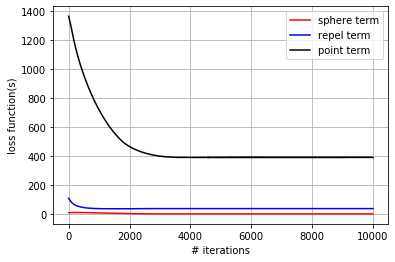

In [75]:
# plotting loss curves
plt.figure()
s_line, = plt.plot(sphere_terms,'r')
r_line, = plt.plot(repel_terms,'b')
p_line, = plt.plot(point_terms,'k')
plt.xlabel('# iterations')
plt.ylabel('loss function(s)')
plt.grid()
plt.legend((s_line,r_line, p_line),('sphere term','repel term', 'point term'))
plt.show()

In [76]:
tf_array = tf_pts.numpy()#gotta convert it to be useable. tf_pts is a special tensorflow variable.
print("the data type of tf_array is: " + str(type(tf_array)))
print("")

print("tf_array is:")
print(tf_array)
print("")

# check if distance of pts from origin is 1
print("the norm is....." + str(np.linalg.norm(tf_array,axis = 1)))


the data type of tf_array is: <class 'numpy.ndarray'>

tf_array is:
[[ 0.64128741 -0.46641012 -0.61232562]
 [-0.56749063 -0.67815532  0.46736826]
 [ 0.51235759  0.53198943  0.67812382]
 [-0.58524085  0.61456713 -0.53420863]]

the norm is.....[1.00186357 1.00018666 1.00268388 1.00278536]


In [77]:
# 2-D Plotting with unit circle
if NUM_DIMS == 2:
    # 2-D Plotting
    fig, axs = plt.subplots(1,1)
    axs.plot(tf_pts[:,0],tf_pts[:,1],'bs')
    axs.axis('equal')
    angles = np.linspace(0, 2 * np.pi, 100)
    axs.plot(np.cos(angles),np.sin(angles))

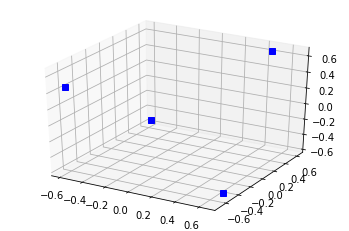

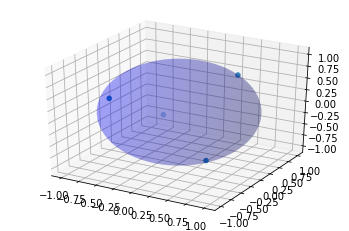

In [78]:
# 3-D Plotting with unit sphere
if NUM_DIMS == 3:
    a = tf_pts
    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    xp = a[:,0]
    yp = a[:,1]
    zp = a[:,2]
    ax.plot(xp, yp, zp, 'bs')
    
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color='b',alpha = 0.2)
    ax.scatter(xp, yp, zp, 'bs')

    plt.show()

I decided to just run the code 5 times rather than write a script to generate all of the shape arrays for me. It was more fun to mess around with settings than to lump all the shapes into a single batch. After running the optimization for a certain number of points, I would execute the relavent cell (below) and store those in a variable for use later. This did pose some problems, and if I had needed to do much more than 5 shapes I would have used a more elegant solution.

In [164]:
Tetrahedron = tf_pts.numpy()#4                              <---Done!

In [165]:
print(Tetrahedron)

[[-0.15002707  0.9897345   0.0191453 ]
 [-0.86299958 -0.47290326  0.19082597]
 [ 0.33579454 -0.26956161 -0.90503305]
 [ 0.67780946 -0.24900342  0.69537813]]


In [176]:
Octahedron = tf_pts.numpy()#6                                <----Done!

In [177]:
print(Octahedron)

[[ 0.9484132   0.68935648 -0.53928403]
 [ 0.83011862 -0.45879703  0.87327385]
 [ 0.27500291 -0.98957959 -0.78125025]
 [-0.82985657  0.458732   -0.87310991]
 [-0.275004    0.98952974  0.78131717]
 [-0.94838302 -0.68937455  0.53932475]]


In [187]:
Cube = tf_pts.numpy()#8                                     <----Done!

In [188]:
print(Cube)

[[ 0.78458434  0.89153913 -1.32600573]
 [-1.23981767  1.06550255  0.94513488]
 [ 1.62954919 -0.69991638  0.16795401]
 [-0.70027247  0.35422203 -0.62297356]
 [ 0.13398334 -1.17845181 -1.12955529]
 [-1.3857031  -1.2543583   0.31143957]
 [ 0.0912816  -0.41221985  0.90833471]
 [ 0.81501427  1.23894469  0.67926412]]


In [154]:
Icosahedron = tf_pts.numpy()#12                           <---Done!

In [166]:
print(Icosahedron)

[[ 1.32228119  1.19121566  1.59132605]
 [-0.79162647 -0.39272845 -2.31413701]
 [-0.93253943  2.19745923  0.46845281]
 [ 0.97421792 -0.22830035  0.01102249]
 [-0.40222168  0.21409074  0.89139056]
 [ 1.27908851 -1.52929515  1.42039555]
 [ 1.62791354 -1.02027769 -1.56621652]
 [ 1.33411127  1.6983452  -1.03822668]
 [-2.30618267  0.013562   -0.24884126]
 [-1.28963514 -1.10351336  1.8607043 ]
 [-0.33028735  0.56455264 -0.75789311]
 [-0.50556018 -1.80774707 -0.3613241 ]]


In [198]:
Dodecahedron = tf_ pts.numpy()#20                              <----Done!

In [199]:
print(Dodecahedron)

[[ 2.33037185 -1.58184319 -1.54094615]
 [-2.82552738  0.62175067 -0.70108796]
 [-0.21679405  0.9696667  -0.12025197]
 [ 0.6813527   2.93430621 -0.92664707]
 [ 1.27587437  0.27061482  2.65565874]
 [ 2.78913472  1.47729095  0.50242165]
 [-0.26238572 -3.07523097 -1.22368762]
 [ 0.43728109  2.58383709  1.80202774]
 [-1.84877965 -1.21258979 -2.41649754]
 [ 1.96013031  0.93217361 -2.41605812]
 [-1.15369764  0.43625527  1.90681537]
 [ 0.2382942  -0.39002311 -1.54998386]
 [-2.18114428  2.40589614  0.86215124]
 [-1.0118989   1.5762224  -2.5583404 ]
 [-0.80274196 -0.59601406  0.03559157]
 [-2.70118704 -1.72081516  0.79103724]
 [ 0.40186745 -2.05903789  0.76605695]
 [ 2.69820387 -1.6655006   1.2361246 ]
 [-0.67485902 -1.75218825  2.8783778 ]
 [ 0.9688662  -0.05223496  0.24428765]]


In [208]:
#testing my slicing and striding skills
matrix = np.asarray([
    [1, 2, 4],
    [3, 4, 5],
    [3, 5, 3],
])

print(matrix[:,1])

[2 4 5]


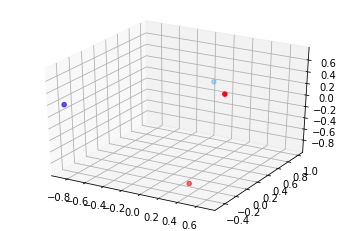

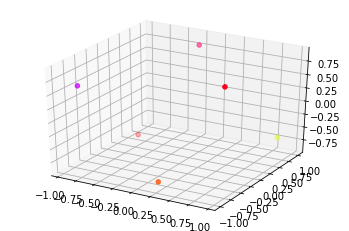

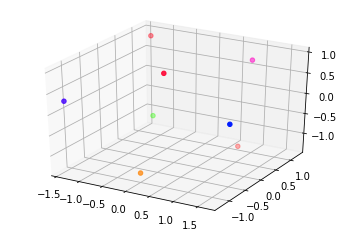

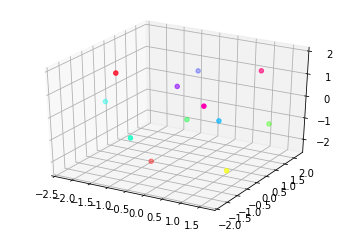

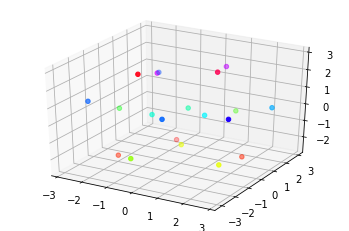

In [237]:
#function that accepts an array of shapes to plot.
def plot_shapes(shapes):
    
    for shape in shapes:
    
        fig = plt.figure()
        ax = plt.axes(projection="3d")

        z_points = shape[:,2]
        x_points = shape[:,0]
        y_points = shape[:,1]
        ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

        plt.show()
        
    
#put all our shapes in one array and plot 'em.
shape_array = [Tetrahedron, Octahedron, Cube, Icosahedron, Dodecahedron]
plot_shapes(shape_array)

Side project: try and visualize my results well!

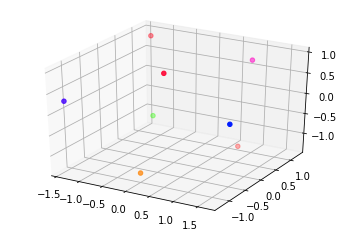

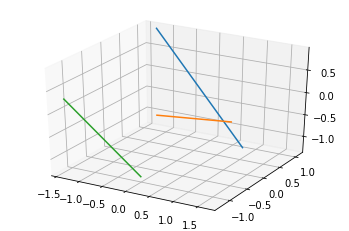

In [253]:
    
shape = Cube

fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = shape[:,2]
x_points = shape[:,0]
y_points = shape[:,1]
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.show()

#break Cube into x and y and z components in sets of 2 for points to connect.

#ongoing work. I'm trying to figure out how to actually connect the dots
#correctly for any platonic solid. It's a toughie.
def connect_the_dots(shape):
  
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    
    for i in range(0, len(shape), 2):
        
        if i is not 0:
            
            #these are each a list of 2 points.
            x_pts = shape[:,0][i-2:i]
            y_pts = shape[:,1][i-2:i]
            z_pts = shape[:,2][i-2:i]

            ax.plot(x_pts, y_pts, z_pts,);

connect_the_dots(Cube)#current error is that I don't get enough combinations of points.





